# Exploratory Data Analysis

In [2]:
from datasets import load_dataset

dataset = load_dataset("roneneldan/TinyStories", split="train")

## Manual Inspection

In [3]:
dataset

Dataset({
    features: ['text'],
    num_rows: 2119719
})

In [4]:
import pandas as pd

df = pd.DataFrame(dataset)

In [5]:
df.isnull().sum()

text    0
dtype: int64

In [6]:
print(f"Number of rows: {len(dataset)}")
subset = dataset.select(range(1000))

Number of rows: 2119719


In [7]:
print("===========")
print(subset["text"][0])
print("===========")
print(subset["text"][12])
print("===========")
print(subset["text"][24])

One day, a little girl named Lily found a needle in her room. She knew it was difficult to play with it because it was sharp. Lily wanted to share the needle with her mom, so she could sew a button on her shirt.

Lily went to her mom and said, "Mom, I found this needle. Can you share it with me and sew my shirt?" Her mom smiled and said, "Yes, Lily, we can share the needle and fix your shirt."

Together, they shared the needle and sewed the button on Lily's shirt. It was not difficult for them because they were sharing and helping each other. After they finished, Lily thanked her mom for sharing the needle and fixing her shirt. They both felt happy because they had shared and worked together.
One day, a girl named Mia went for a walk. She saw a big, scary house. It had a tall door and small windows. Mia was brave, so she went inside the house.

In the house, Mia saw a birdcage. Inside the birdcage, there was a little bird. The bird was sad. It wanted to fly and be free. Mia wanted to h

## Statistics

Word count

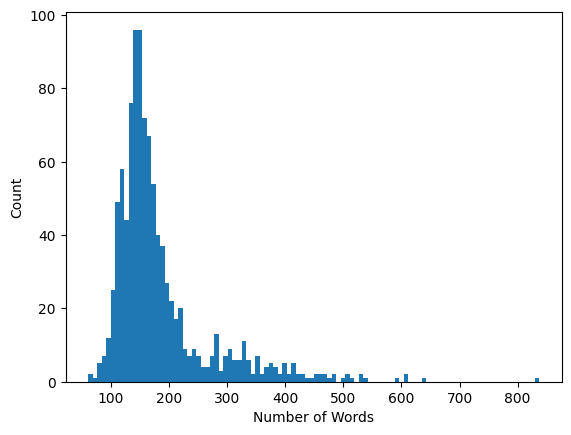

In [ ]:
import matplotlib.pyplot as plt

word_counts = [len(text.split()) for text in subset["text"]]

plt.figure()
plt.hist(word_counts, bins=100)
plt.xlabel("Number of Words")
plt.ylabel("Count")
plt.show()

Wordcloud

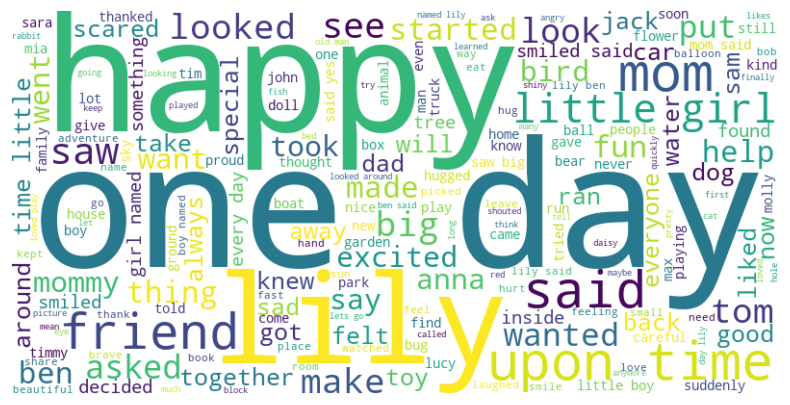

In [ ]:
import re

from wordcloud import STOPWORDS, WordCloud

text = " ".join(list(subset["text"]))

# Remove non latin, and lowercase
text = re.sub(r"[^A-Za-z\s]", "", text)
text = text.lower()

# Remove stopwords
stopwords = set(STOPWORDS)
text = " ".join(word for word in text.split() if word not in stopwords)

# Wordlcoud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Unigrams and Bigrams

In [10]:
import nltk

nltk.download("punkt_tab")

[nltk_data] Downloading package punkt_tab to /Users/roman/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [11]:
from collections import Counter

from nltk import ngrams, word_tokenize

# Tokenize all texts
all_tokens = word_tokenize(text)

# Unigrams (just the tokens)
unigrams = Counter(all_tokens)

# Bigrams
bigrams = Counter(ngrams(all_tokens, 2))

Text(0, 0.5, 'Count')

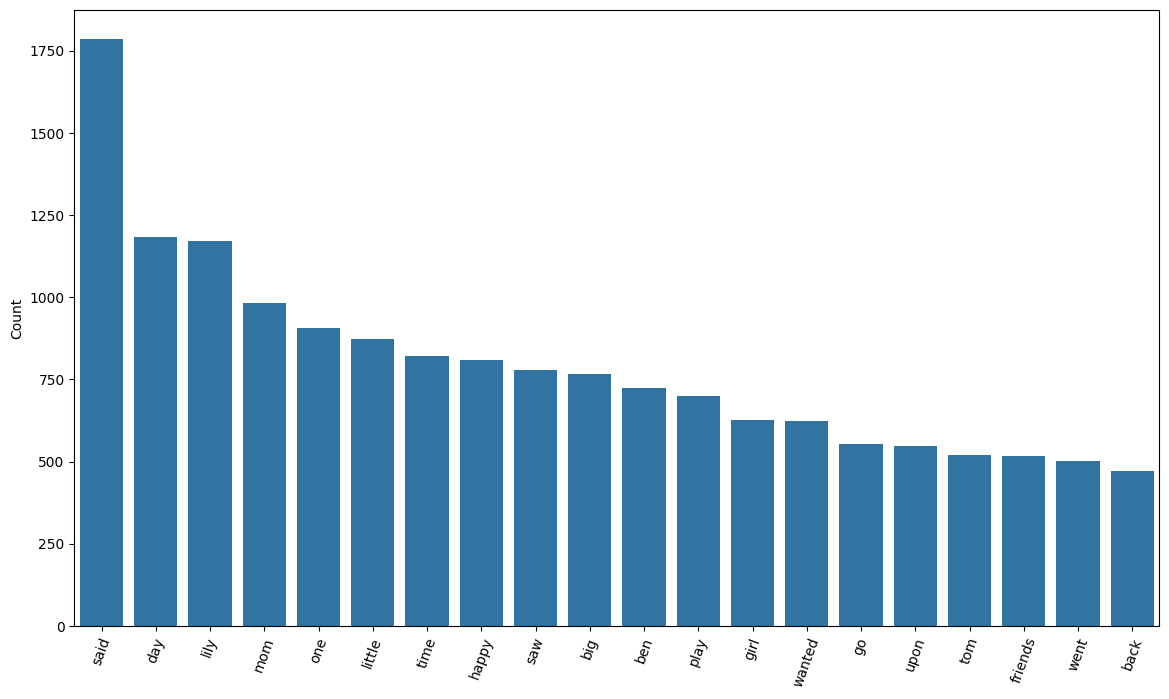

In [15]:
import seaborn as sns

unigram_counts = pd.Series(dict[str, int](unigrams)).sort_values(ascending=False)

plt.figure(figsize=(14, 8))
sns.barplot(data=unigram_counts.head(20))
plt.xticks(rotation=70)
plt.ylabel("Count")

Text(0, 0.5, 'Count')

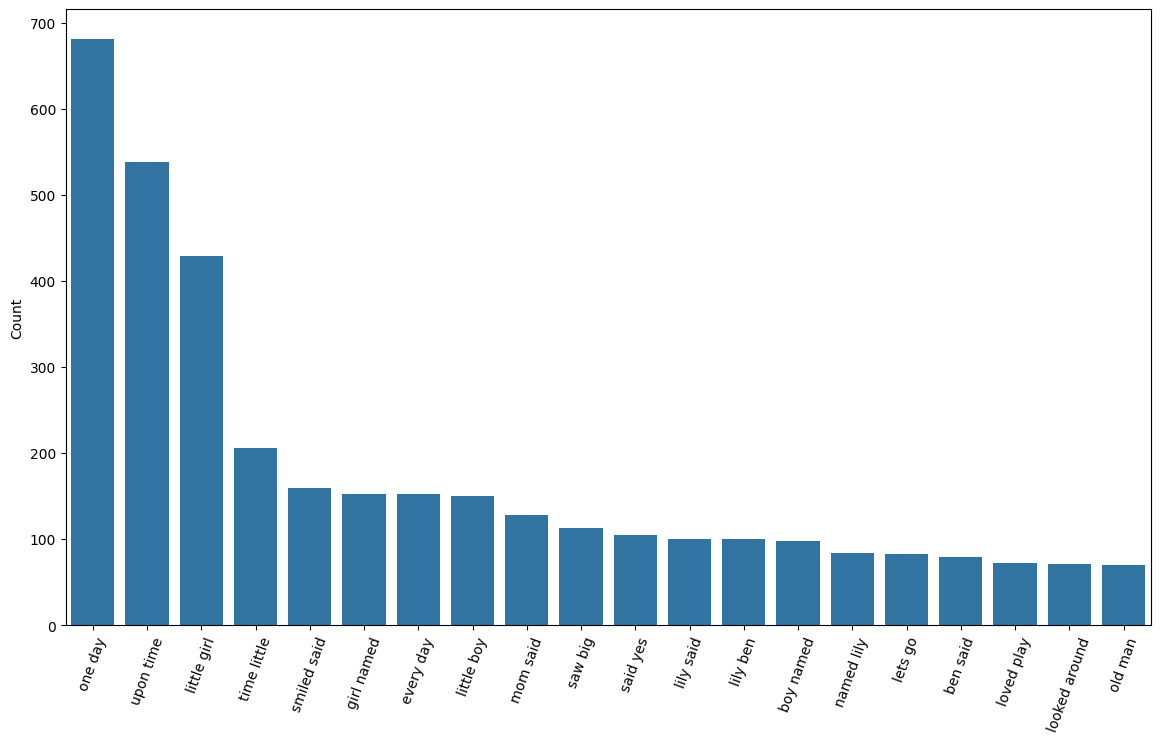

In [16]:
import seaborn as sns

bigram_counts = pd.Series(
    {key[0] + " " + key[1]: value for key, value in bigrams.items()}
).sort_values(ascending=False)

plt.figure(figsize=(14, 8))
sns.barplot(data=bigram_counts.head(20))
plt.xticks(rotation=70)
plt.ylabel("Count")